# Clasificador de Imágenes Diurnas y Nocturnas
---

Para esta tarea utilizaremos un dataset que consiste de 200 imágenes RGB en dos categorías: Diurnas y nocturnas. Hay 100 imágenes diurnas y 100 nocturnas.

Construiremos un clasificador que pueda etiquetar éstas imágenes como "día" o "noche" de manera acertada, y que se apoye en las características distintivas de cada tipo de fotografía.

*NOTA*: Todas las imágenes provienen de [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


## Importando los recursos

Antes de comenzar, necesitamos importar las librerías que utilizaremos

In [1]:
import cv2
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Data de entrenamiento y de prueba

Las 200 imágenes diurnas/nocturnas están separadas en datasets de entrenamiento y de prueba, donde:

- 60% de éstas imágenes constituyen el dataset de entrenamiento que usaremos para crear el clasificador.
- 40% son imágenes de prueba, las cuales usaremos para poner a prueba el desempeño del clasificador.

In [2]:
# Directorios donde se hallan las imágenes
image_training_directory = 'day_night_images/training/'
image_test_directory = 'day_night_images/test/'

## Cargando los datasets

En las siguientes líneas de código cargaremos las imágenes de entrenamiento en una variable llamada `IMAGE_LIST`. Ésta lista contiene las imágenes y su etiqueta asociada ("day" o "night").

Por ejemplo, el primer par imagen-etiqueta puede ser accedido así: `IMAGE_LIST[0][:]`

In [3]:
# Carguemos las imágenes. Para más detalles, mira la función load_dataset en helpers.py.
IMAGE_LIST = helpers.load_dataset(image_training_directory)

## Construyendo una `STANDARDIZED_LIST` de imágenes de entrada y etiquetas de salida

Esta función toma una lista de pares de imagen-etiqueta y produce una lista estandarizada de imágenes reajustadas en tamaño y etiquetas numéricas.

In [4]:
# Estandariza todas las imágenes de entrenamiento.
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualizando la data estandarizada

Mostremos una imagen estandarizada de la STANDARDIZED_LIST.

Forma: (600, 1100, 3)
Etiqueta [1 = day, 0 = night]: 0


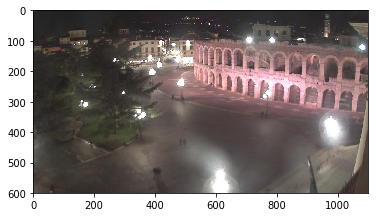

In [5]:
# Muestra una imagen estandarizada junto con su etiqueta

# Selecciona una imagen por índice.
index = 0
selected_image = STANDARDIZED_LIST[index][0]
selected_label = STANDARDIZED_LIST[index][1]

# Muestra la imagen e información de la misma.
plt.imshow(selected_image)
print("Forma: {}".format(selected_image.shape))
print("Etiqueta [1 = day, 0 = night]: {}".format(selected_label))

## Extracción de características (_features_)

Creemos un feature que represente el brillo de la imagen. Extraeremos el **brillo promedio** utilizando el espacio de color HSV. Especialmente, utilizaremos el canal V (el cual mide el brillo), y sumaremos los valores de los píxeles en dicho canal, para luego dividirla por el área de la imagen.

---
### Encontremos el brillo promedio utilizando el canal V

Esta función toma una imagen RGB **estandarizada** y retorna un _feature_ (un único valor) que representa el nivel promedio de brillo en la imagen. Utilizaremos ésta cifra para clasificar la imagen como diurna o nocturna.

In [6]:
# Encontremos el brillo promedio
def average_brightness(rgb_image):
    # Pasemos a HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Sumemos todos los píxeles en el canal V
    sum_brightness = np.sum(hsv[:, :, 2])
    area = 600 * 1100.0  # Estas dimensiones las sabemos de antemano.
    
    return sum_brightness / area

Brillo promedio: 195.48862272727274


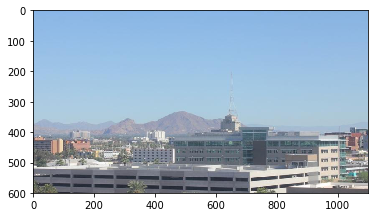

In [7]:
# Probemos los niveles de brillo para diferentes imágenes
# Mira distintas imágenes diurnas y nocturnas. Intenta encontrar un umbral U
# tal que imágenes con un brillo promedio por debajo de ese umbral sean clasificadas
# como nocturnas, mientras que las que tengan un brillo por encima, sean categorizadas
# como dirunas.

index = 190
test_image = STANDARDIZED_LIST[index][0]

average = average_brightness(test_image)
print('Brillo promedio: {}'.format(average))
plt.imshow(test_image)

## Clasificación y Visualización del Error

En esta sección convertiremos nuestro _feature_ en un clasificador que toma una imagen estandarizada y produce una predicción de etiqueta para esa imagen. El resultado de esta función será 0 para noche y 1 para día.

---

In [8]:
def estimate_label(rgb_image):
    brightness = average_brightness(rgb_image)
    
    threshold = 100.0
    
    if brightness >= threshold:
        return 1
    else:
        return 0

In [9]:
# Probemos nuestro código
print('Etiqueta: ', estimate_label(test_image))

Etiqueta:  1


In [10]:
# Veamos qué tan preciso (accurate) es nuestro modelo

good_predictions = 0
for image, label in STANDARDIZED_LIST:
    predicted_label = estimate_label(image)
    
    if predicted_label == label:
        good_predictions += 1
        

accuracy = good_predictions / len(STANDARDIZED_LIST)
print('Precisión (accuracy) del modelo:', accuracy)

Precisión (accuracy) del modelo: 0.9041666666666667
